In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#tensorflow functions
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 167s 1us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

array([6], dtype=uint8)

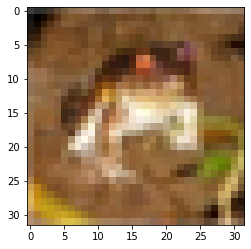

In [15]:
example=0
plt.imshow(x_train[example])
y_train[example]

In [16]:
x_train = x_train/255 #normalization saves training time
x_test = x_test/255

In [17]:
y_cat_train = to_categorical(y_train, 10) #converts to binary class matrix
y_cat_test = to_categorical(y_test, 10)

In [19]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train[0] #the index loaction corresponds to the label

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
#Done preparing data. Now we make the neural network

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape=(32,32,3), activation = "relu"))
model.add(Conv2D(filters=32, kernel_size = (4,4), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1384704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 1,405,258
Trainable params: 1,405,258
Non-trainable params: 0
______________________________________________

In [23]:
from tensorflow.keras.callbacks import EarlyStopping #helps to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [24]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3812 - accuracy: 0.5054 - val_loss: 1.1827 - val_accuracy: 0.5753
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0195 - accuracy: 0.6399 - val_loss: 0.9945 - val_accuracy: 0.6492
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8400 - accuracy: 0.7072 - val_loss: 0.9689 - val_accuracy: 0.6615
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6901 - accuracy: 0.7584 - val_loss: 0.9717 - val_accuracy: 0.6708


<AxesSubplot:>

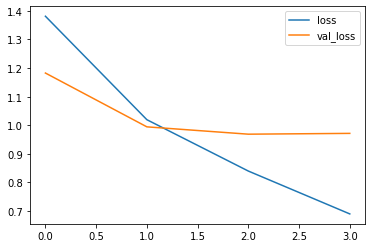

In [25]:
losses = pd.DataFrame(model.history.history) #check for overfitting
losses[["loss", "val_loss"]].plot()

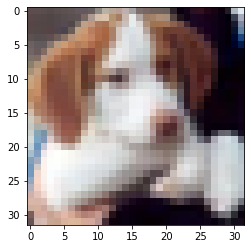

In [28]:
my_image = x_test[16]
plt.imshow(my_image)

In [29]:
model.predict_classes(my_image.reshape(1,32,32,3))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5], dtype=int64)

In [30]:
#the output 5, corresponds with the dog label. 

In [ ]:
def domainExpansion(picture):
  model.predict_classes(picture)
  if model.predict_classes(picture)[0] == 0:
    print("This is an airplane")
  if model.predict_classes(picture)[0] == 1:
    print("This is an automobile")
  if model.predict_classes(picture)[0] == 2:
    print("This is a bird")
  if model.predict_classes(picture)[0] == 3:
    print("This is cat. Neko-chan!!! [^._.^]ﾉ彡")
  if model.predict_classes(picture)[0] == 4:
    print("This is a deer")
  if model.predict_classes(picture)[0] == 5:
    print("This is a dog")
  if model.predict_classes(picture)[0] == 6:
    print("This is a frog")
  if model.predict_classes(picture)[0] == 7:
    print("This is a horse")
  if model.predict_classes(picture)[0] == 8:
    print("This is a ship")
  if model.predict_classes(picture)[0] == 9:
    print("This is a truck")